# Student Name: Kanav Jamwal
# Student ID: 29554209

## Section A. Model Complexity and Model Selection

## Question 1

In [2]:
options(warn=-1)
library(reshape2)
library(ggplot2)
library(corrplot)

corrplot 0.84 loaded


In [3]:
train_data<-read.csv("Task1A_train.csv")
test_data<-read.csv('Task1A_test.csv')

In [4]:
train.data <- train_data[1]
train.label <- train_data[,2]
test.data <- test_data[1]
test.label <- test_data[,2]

In [5]:
train.data[,1]

[1] 1960.0 1960.5 1961.0 1961.5 1962.0 1962.5 1963.0 1963.5 1964.0 1964.5
[11] 1965.0 1965.5 1966.0 1966.5 1967.0 1967.5 1968.0 1968.5 1969.0 1969.5
[21] 1970.0 1970.5 1971.0 1971.5 1972.0 1972.5 1973.0 1973.5 1974.0 1974.5
[31] 1975.0 1975.5 1976.0 1976.5 1977.0 1977.5 1978.0 1978.5 1979.0 1979.5
[41] 1980.0 1980.5

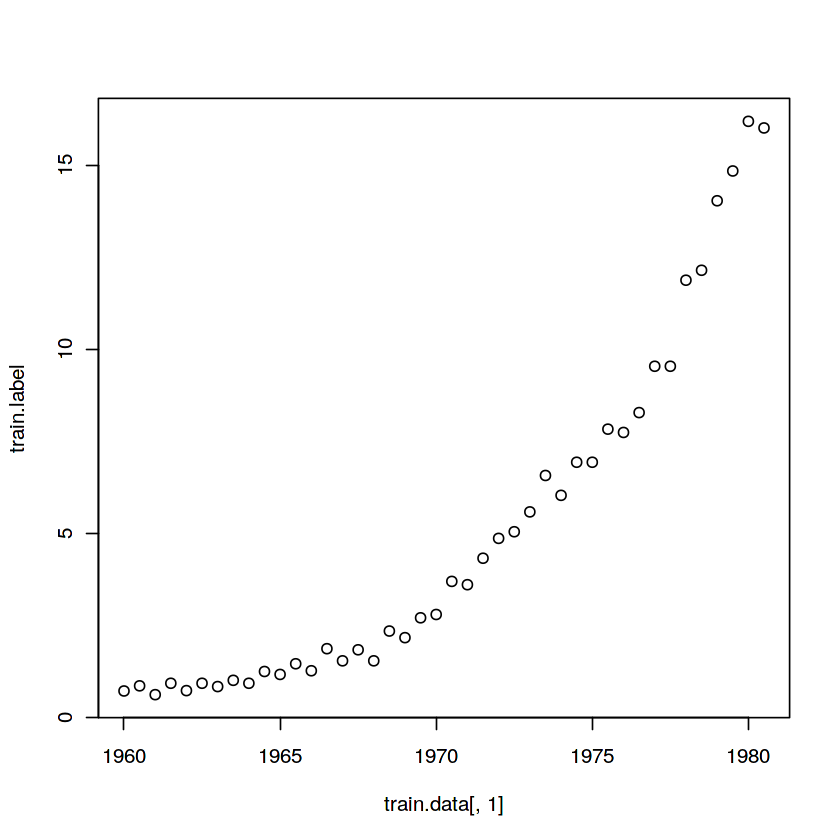

In [6]:
plot(x=train.data[,1],y=train.label)

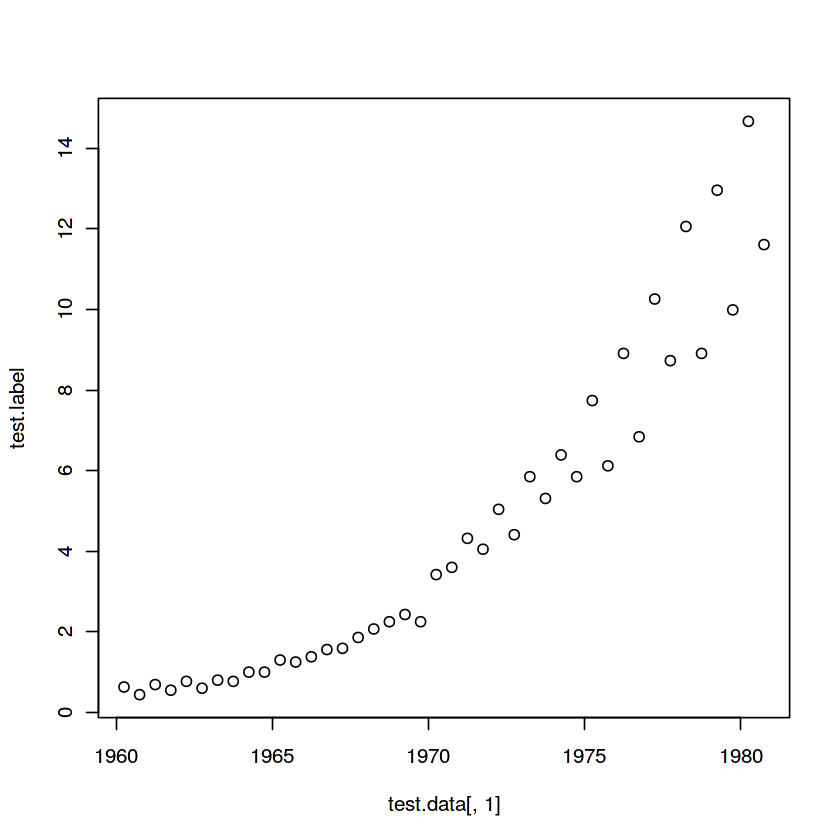

In [7]:
plot(x=test.data[,1],y=test.label)

## 1. Implementation of KNN Regressor

In [8]:
# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate the predicted labels according to the mean
        test.label[i]<- (mean(train.label[nn]))
    }
    
    ## return the class labels as output
    return (test.label)
}

In [9]:
# let see what is the prediciton of our knn for test samples when K=4
knn(train.data, train.label, test.data, K=4)

[1]  0.7725  0.7725  0.7750  0.7925  0.8475  0.8675  0.9175  0.9975  1.0800
[10]  1.1925  1.2775  1.4325  1.5250  1.6200  1.6875  1.8075  1.9650  2.1825
[19]  2.4975  2.8350  3.1950  3.6000  4.1175  4.4550  4.9500  5.5125  5.8050
[28]  6.2775  6.6150  6.9300  7.3575  7.6950  8.3475  8.7750  9.8100 10.7775
[37] 11.9025 13.2300 14.3100 15.2775 15.2775 15.2775

In [10]:
# calculate the train and test missclassification rates for K in 1:20 
# THIS MAY TAKE A FEW MINUTES TO COMPLETE!
miss <- data.frame('K'=1:20, 'train'=rep(0,20), 'test'=rep(0,20))
for (k in 1:20){
    miss[k,'train'] <- sum((knn(train.data, train.label, train.data, K=k) - train.label) ^ 2)/nrow(train.data)
    miss[k,'test'] <-  sum((knn(train.data, train.label, test.data, K=k)  - test.label)^2)/nrow(test.data) 
}

## 2. Plotting the Regression error

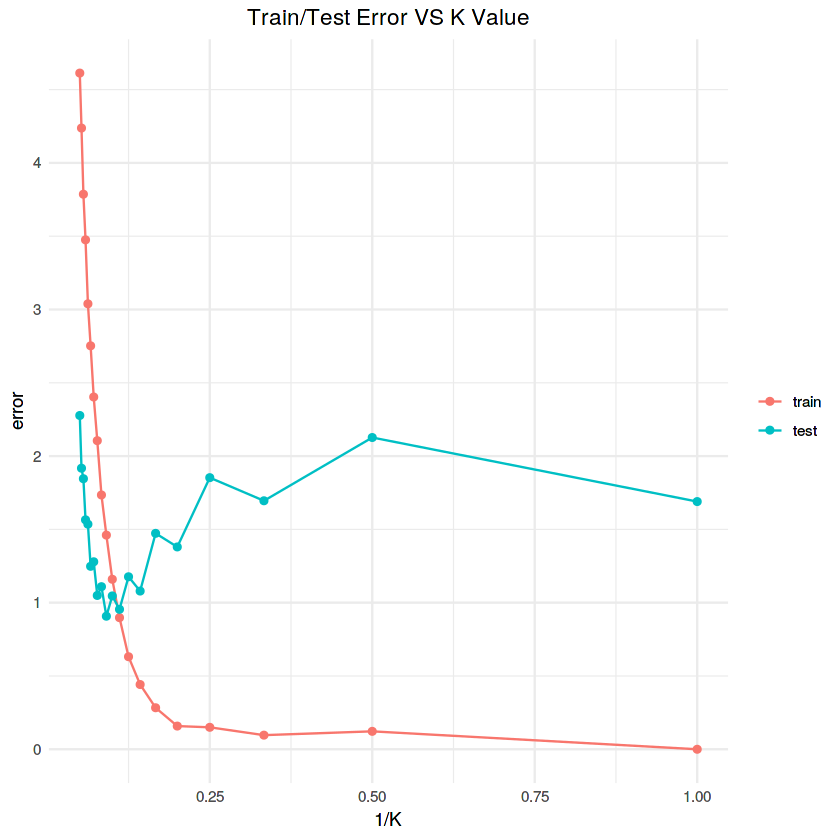

In [11]:
# plot misclassification percentage for train and test data sets
miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'error')
ggplot(data=miss.m, aes(x=1/K, y=error, color=type)) + geom_line() + geom_point() + scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +ggtitle("Train/Test Error VS K Value")+theme(plot.title = element_text(hjust = 0.5))

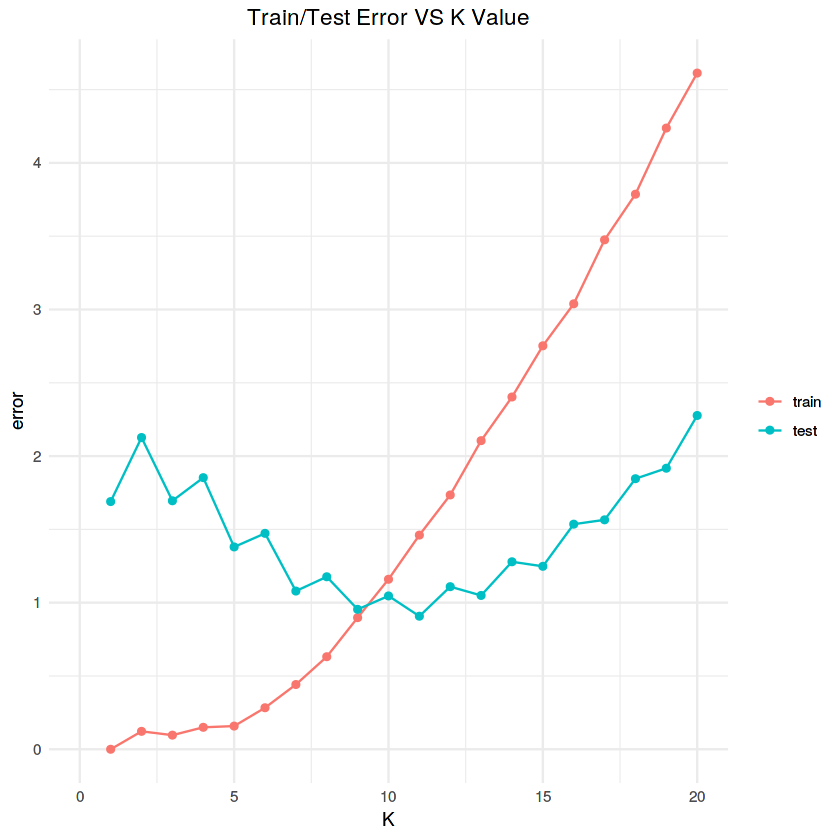

In [12]:
ggplot(data=miss.m, aes(x=K, y=error, color=type))+xlim(0, 20) + geom_line() +scale_color_discrete(guide = guide_legend(title = NULL))+ theme_minimal() + geom_point()+ggtitle("Train/Test Error VS K Value")+theme(plot.title = element_text(hjust = 0.5))

## 3. Report

* The best value of K is around 8. 
* In which value of 1/K = 0.1.

* For K = 1 the classifier leads to **over-fitting** , as the value of training error is almost zero and test error is very high. 

* For K > 10 the classifier leads to **underfitting** , as the training and test error both are high.